# (Ford go bike)
## by (Nourhan Elsayed Abdo Mohamed)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

## Data wrangling

### Gather

In [2]:
df = pd.read_csv("ford go bike.csv",parse_dates=['start_time','end_time'])

### Assess

In [3]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
len(df["start_station_id"].unique())

330

In [9]:
len(df["end_station_id"].unique())           

330

In [10]:
len(df["bike_id"].unique())

4646

### Assessment summery
#### Quality issues:
wrong data type in start_station_id  & end_station_id  and  bike_id         

missing values in member_birth_year & member_gender

unuseful data (start_station_latitude & start_station_longitude & end_station_latitude & end_station_longitude)

### Clean

In [11]:
df1 = df.copy()

#### define

convert the start_station_id & end_station_id and bike_id data type from a float to a string using astype()

#### code

In [12]:
df1.start_station_id= df1.start_station_id.astype(str)
df1.end_station_id = df1.end_station_id.astype(str)
df1.bike_id = df1.bike_id.astype(str)

#### test

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

#### define 
drop missing values in member_birth_year & member_gender

#### code

In [14]:
df1.dropna()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


#### test

In [15]:
df2 = df1.dropna()
df2 = df2.reset_index(drop=True)

In [16]:
df2.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### define
drop unuseful data (start_station_latitude & start_station_longitude & end_station_latitude & end_station_longitude)

#### code

In [17]:
df2.drop('start_station_latitude',inplace=True , axis=1)
df2.drop('end_station_longitude',inplace = True , axis= 1)

In [18]:
del df2['start_station_longitude']

In [19]:
df2.pop("end_station_latitude")

0         37.794231
1         37.786375
2         37.773311
3         37.792714
4         37.798014
            ...    
174947    37.788300
174948    37.778742
174949    37.333658
174950    37.817827
174951    37.785000
Name: end_station_latitude, Length: 174952, dtype: float64

#### test

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns

In [21]:
df2.shape

(174952, 12)

### What is the structure of your dataset?

> this dataset has 174952 index for 12 variables which are :  duration_sec ,start_time , end_time,start_station_id , start_station_name, end_station_id, end_station_name, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

> I am intersted in duration_seconds

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect user_type , member_gender, bike_id, age ,start_time,start_statin_id, end_station_id will support my investigation

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

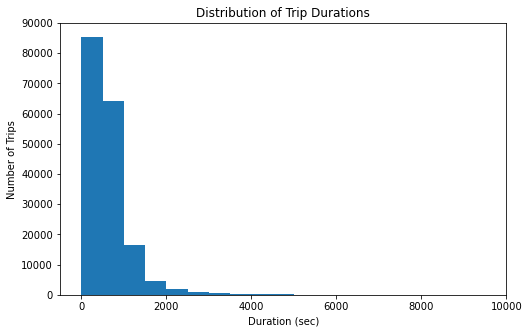

In [22]:
# duration destribution
binsize = 500
bins = np.arange(0, df2['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()


#### There is a long tail in the distribution so lets put it on log scale.

<ipython-input-23-ddc62bf421bd>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


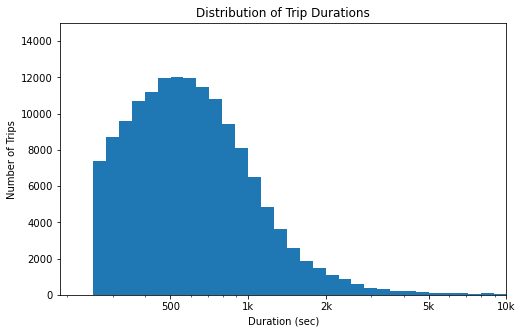

In [23]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df2['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show();


#### Trip duration is mostly concentrated on the lower spectrum. Most of the values are less than 2000 seconds with peak around 600

#### seconds. Trip duration values first increases starting from arount 8000 values at 0 to 12500 values at around 600 but then starts 
#### to fall and raching below 2000 values under 2000 sec.



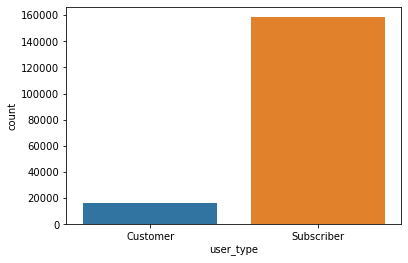

In [24]:
# user_type distribution
sb.countplot(data=df2, x= "user_type");

#### Subscribers represent the vast majority of users

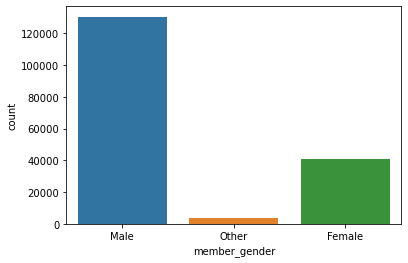

In [25]:
# member_gender distribution
sb.countplot(data= df2, x= "member_gender");

#### males are the most  members

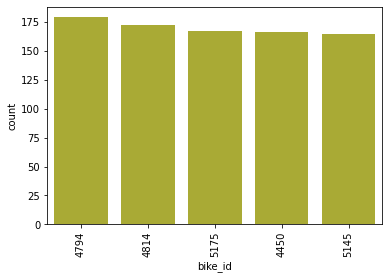

In [26]:
# the most commom bikes
freq=df2["bike_id"].value_counts()
bike_order= freq.index[:5]
base_color=sb.color_palette()[8]
sb.countplot(data= df2, x= "bike_id",color= base_color, order=bike_order);
plt.xticks(rotation=90);

#### the top five common bikes are (4794, 4814, 5175,4450,5154)

In [50]:
#adding new column for members age
df2['age']=2021-df2['member_birth_year'] 

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  age             

In [29]:
df2['age'].describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

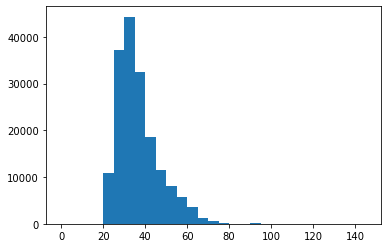

In [30]:
# age distribution
bins = np.arange(0, df2['age'].max()+5, 5)
plt.hist(data= df2, x='age',bins=bins);

#### We can see that the distribution is more concentrated between 20 to 40 years old.

In [31]:
# creat a new column for every trip from start station to end station
df2['trip']=df2['start_station_name']+':'+ df2['end_station_name']


In [32]:
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,37.0,Montgomery St BART Station (Market St at 2nd S...
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,49.0,Market St at Dolores St:Powell St BART Station...
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,32.0,Grove St at Masonic Ave:Central Ave at Fell St
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,47.0,Frank H Ogawa Plaza:10th Ave at E 15th St
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,62.0,4th St at Mission Bay Blvd S:Broadway at Kearny


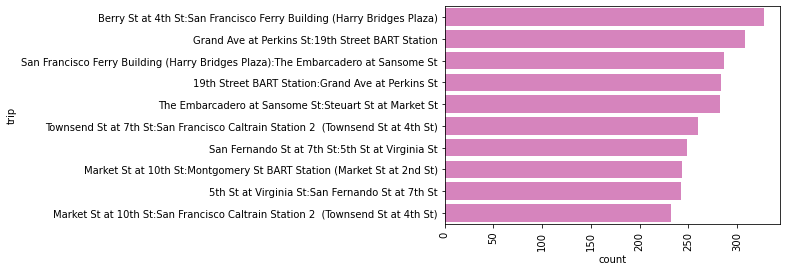

In [33]:
# the most common trips
freq=df2["trip"].value_counts()
trip_order= freq.index[:10]
base_color=sb.color_palette()[6]
sb.countplot(data= df2, y= "trip",color= base_color, order=trip_order);
plt.xticks(rotation=90);

#### the most common ten trips are(Berry st to sanfrancisco /grande Ave to part station/ sanfrancisco to the embarcadero/ Bart station to grande Ave/ the embarcadero to steuart st / townnsend st to san francisco/ san fernando to 5th st / market st to Bart station/ 5th st to san fernando / market st to san francisco)

#### Also we have noticed that some stations are linked to another stations and switches between them back and forth in the trip like : grane Ave - Bart statin & san fernando - 5th st


In [34]:
# creat new column for months of the year
df2['day_of_month']=df2.start_time.dt.day

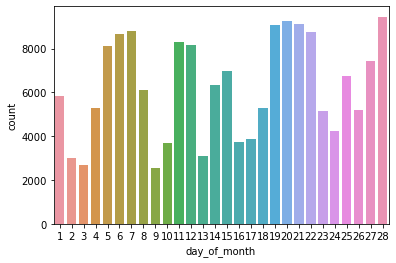

In [35]:
# start day distribution
sb.countplot(data=df2, x="day_of_month");

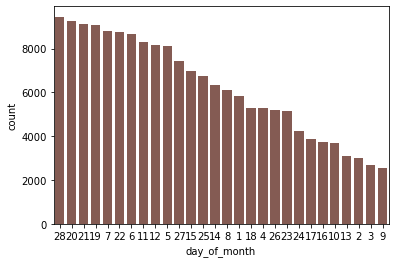

In [36]:
# the most commom  days for starting
freq=df2["day_of_month"].value_counts()
days_order= freq.index[:]
base_color=sb.color_palette()[5]
sb.countplot(data= df2, x= "day_of_month",color= base_color, order=days_order);

#### We notice that the location of the day of the month does not affect much of the start, as we find some increase and also decrease

#### at the beginning of the month, middle and end

In [37]:
# creat new column for start hour of the day
df2['hour_of_day']=df2.start_time.dt.hour

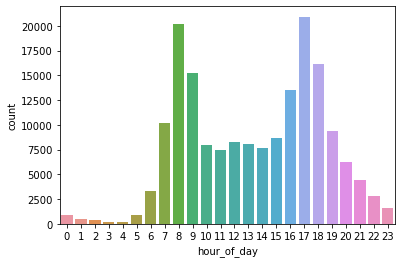

In [38]:
# start hours distribution
sb.countplot(data=df2, x="hour_of_day");

####  We notice that the most hours of the day to start is in the morning from eight to nine, then it begins to decline until it increases

#### again in the afternoon from 4 to 6 and returns to decrease again in the evening until it reaches its lowest value at 3 & 4 am

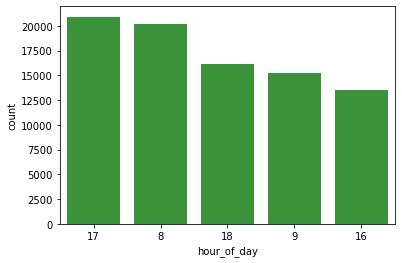

In [39]:
# the most commom  hours for starting
freq=df2["hour_of_day"].value_counts()
hours_order= freq.index[:5]
base_color=sb.color_palette()[2]
sb.countplot(data= df2, x= "hour_of_day",color= base_color, order=hours_order);

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  age             

#### the most commom hours of day for starting are : in morning from 8:9 and evening from 4:6

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration takes a large amount of values and is concentrated to a tail so I made a log transform for it.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Birth year is converted by substracting the year from current year so this gives us a distribution for age. also We extracted hours from day and day from month from the start time date data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Lets  see the correlation between trip duration and age.

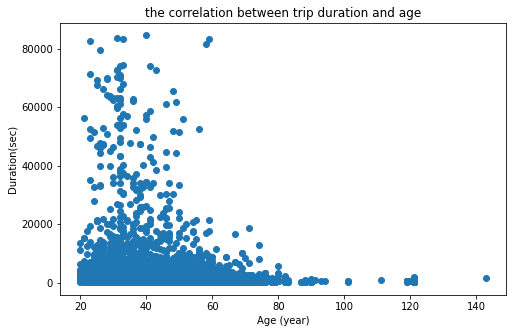

In [41]:
plt.figure(figsize=[8,5])
plt.scatter(data = df2, x = 'age', y = 'duration_sec');
plt.title('the correlation between trip duration and age')
plt.xlabel('Age (year)')
plt.ylabel('Duration(sec)');


#### there is no correlation between the two variables 

#### the relationship between user type and duration

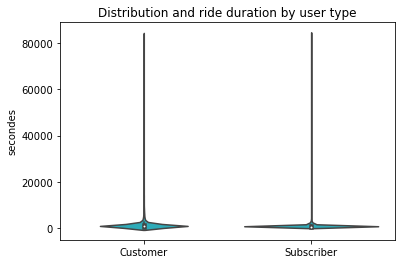

In [42]:
base_color = sb.color_palette()[9]
sb.violinplot(data = df2, x='user_type', y='duration_sec', color=base_color)
plt.xlabel('')
plt.ylabel('secondes')
plt.title('Distribution and ride duration by user type');

#### Subscribers make lots of short rides & Customers can afford longer rides 

#### the relationship between member gender and duration

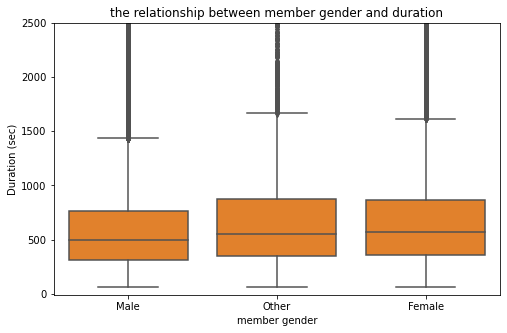

In [43]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df2, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('member gender')
plt.ylabel('Duration (sec)')
plt.title('the relationship between member gender and duration')
plt.show()

#### males have less median than femals and other gender

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration has no dependend on the age of the member

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> there is a relationship between user type and duration as Subscribers make lots of short rides & Customers can afford longer rides

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\START\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


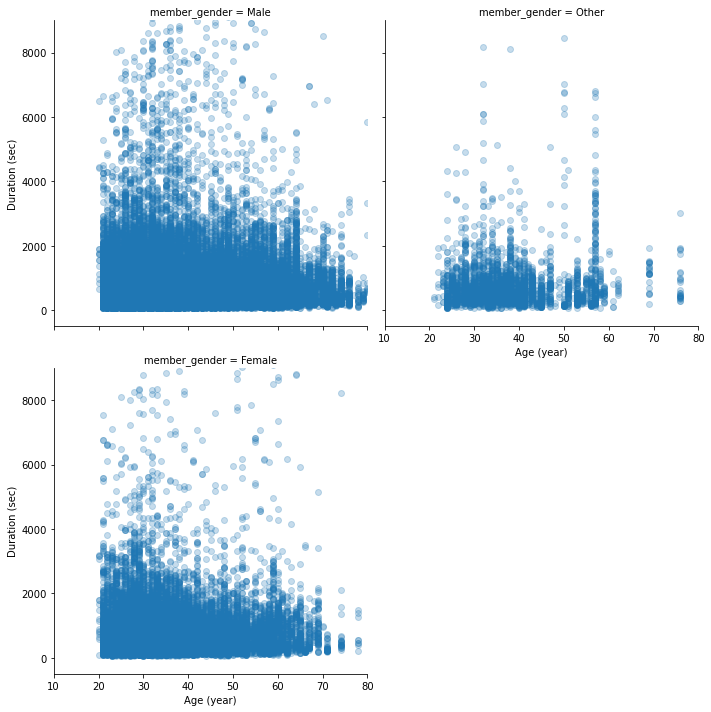

In [44]:

genders = sb.FacetGrid(data = df2, col = 'member_gender', col_wrap = 2, size = 5,  xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (sec)')
plt.show();

#### there is a jump in duration for others at an older age (around 60 years).



C:\Users\START\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\START\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


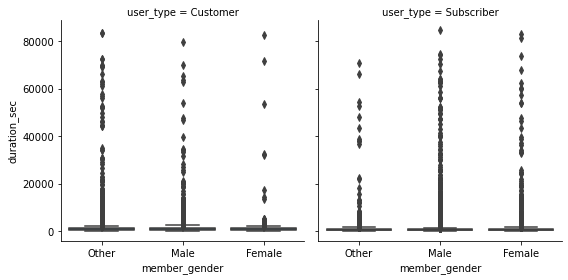

In [61]:
g = sb.FacetGrid(data = df2, col = 'user_type', size = 4)
g.map(sb.boxplot, 'member_gender', 'duration_sec');

#### males subscribers have the longest trips 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here we observed that though the number of higher duration trip is higher for male but percentage is higher for women and other, also other has one more peak at nearly the age of 60 years for higher duration time. For different user types Subscribers make lots of short rides

### Were there any interesting or surprising interactions between features?

 the jump in duration for others at an older age

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!